# Retirement Planner

---

## Environment Setup

In [17]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
from pathlib import Path
from dotenv import load_dotenv
%matplotlib inline

In [18]:
# Set the random seed for resutls reproducibility (for testing purposes only)
np.random.seed(42)

---

## Portfolio Planner

In this activity, you will use the Alpaca API to grab historical data for a `60/40` portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [19]:
# Set environment variables from the .env file
env_path = Path("/Users/GrantDePalma")/'.env'
load_dotenv(env_path)

True

In [20]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
type(alpaca_api_key)

str

In [21]:
# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [22]:
api.list_assets()

[Asset({   'class': 'us_equity',
     'easy_to_borrow': False,
     'exchange': 'NYSE',
     'id': 'c33af055-182d-4391-b180-7c3f6ad92743',
     'marginable': False,
     'name': 'Structured Products CorTS J.C. Penney Debs, 7 5/8% Cert.',
     'shortable': False,
     'status': 'inactive',
     'symbol': 'KTP',
     'tradable': False}),
 Asset({   'class': 'us_equity',
     'easy_to_borrow': False,
     'exchange': 'BATS',
     'id': '859f18ba-bf51-47eb-830f-a7e2933fa660',
     'marginable': False,
     'name': 'Legg Mason Emerging Markets Low Volatility High Dividend ETF',
     'shortable': False,
     'status': 'inactive',
     'symbol': 'LVHE',
     'tradable': False}),
 Asset({   'class': 'us_equity',
     'easy_to_borrow': False,
     'exchange': 'NASDAQ',
     'id': '2a5db6a2-c035-46cc-840f-fa519740a9b5',
     'marginable': True,
     'name': 'LifeSci Acquisition Corp. Common Stock',
     'shortable': False,
     'status': 'active',
     'symbol': 'LSAC',
     'tradable': True}),


In [23]:
help(api)

Help on REST in module alpaca_trade_api.rest object:

class REST(builtins.object)
 |  REST(key_id=None, secret_key=None, base_url=None, api_version=None, oauth=None)
 |  
 |  Methods defined here:
 |  
 |  __enter__(self)
 |  
 |  __exit__(self, exc_type, exc_val, exc_tb)
 |  
 |  __init__(self, key_id=None, secret_key=None, base_url=None, api_version=None, oauth=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  add_to_watchlist(self, watchlist_id, symbol)
 |  
 |  add_watchlist(self, watchlist_name)
 |  
 |  cancel_all_orders(self)
 |      Cancel all open orders
 |  
 |  cancel_order(self, order_id)
 |      Cancel an order
 |  
 |  close(self)
 |  
 |  close_all_positions(self)
 |      Liquidates all open positions at market price
 |  
 |  close_position(self, symbol)
 |      Liquidates the position for the given symbol at market price
 |  
 |  data_get(self, path, data=None)
 |  
 |  delete(self, path, data=None)
 |  
 |  delete_from_watchlist(self

# Data Collection

In this step, you will need to use the Alpaca api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [24]:
# Subset your tickers, then pull returns data:
# Set the ticker
ticker = ["SPY", "AGG"]

# Set timeframe to '1D'
timeframe = "1D" 

# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp('2019-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2019-12-31', tz='America/New_York').isoformat()

# Get 1 year's worth of historical data for SPY and AGG
df = api.get_barset(
    ticker,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df

# Drop unnecessary columns
df = df.drop(
    columns=['open', 'high', 'low', 'volume'],
    level=1
)

In [25]:
# Display sample data
df.head()

,AGG,SPY
,close,close
time,,
2019-01-02 00:00:00-05:00,106.585,249.89
2019-01-03 00:00:00-05:00,107.020,244.46
2019-01-04 00:00:00-05:00,106.695,252.41
2019-01-07 00:00:00-05:00,106.470,254.40
2019-01-08 00:00:00-05:00,106.420,256.65


---

## Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:

1. Calculate the daily returns for the SPY and AGG closing prices.

2. Calculate volatility for both the SPY and AGG closing prices.

3. Find the last day's closing price for both stocks and save those as variables

4. Run a Monte Carlo Simulation of at least `100` iterations and generate at least `30` years of closing prices

**Hint:** There are `252` trading days per year, so the number of records to generate for each Monte Carlo run will be `252 days * 30 years`.

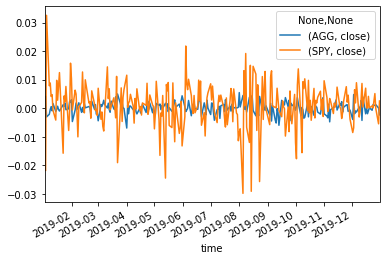

In [26]:
# Calculate the daily roi for the stocks
daily_returns = df.pct_change()

# Display sample data
daily_returns.plot()

In [27]:
# Compute daily volatility
daily_std = daily_returns.std()
daily_std

AGG  close    0.00209
SPY  close    0.00782
dtype: float64

In [29]:
# Calculate statistical Parameters
mean_daily_return_agg = daily_returns.mean()['AGG']['close']
std_daily_return_agg = daily_returns.std()['AGG']['close']
mean_daily_return_spy = daily_returns.mean()['SPY']['close']
std_daily_return_spy = daily_returns.std()['SPY']['close']

In [30]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 252 * 30
monte_carlo = pd.DataFrame()
monte_carlo

""


In [31]:
aag_last_price = df['AGG']['close'][-1]


In [46]:
# Run the Monte Carlo Simulation
num_simulations = 1000
num_trading_days_per_yr = 252
num_years = 30
num_trading_days = num_years * num_trading_days_per_yr

# Set last closing prices of 'AGG' and 'SPY'
agg_last_price = df['AGG']['close'][-1]
spy_last_price = df['SPY']['close'][-1]

# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_price_df = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

# Run the simulation of projecting stock prices for the next trading year, '1000' times
for n in range(num_simulations):
    # Initialize the simulated prices list with last closing price of 'AGG' and 'SPY'
    simulated_agg_prices = [agg_last_price]
    simulated_spy_prices = [spy_last_price]
    
    # Simulate the returns for 252 days
    for i in range (num_trading_days):
        # Calculate the simulated price using the last price within the list
        simulated_agg_price = simulated_agg_prices[-1] * (1+ np.random.normal(mean_daily_return_agg, std_daily_return_agg))
        simulated_spy_price = simulated_spy_prices[-1] * (1+ np.random.normal(mean_daily_return_spy, std_daily_return_spy))
        
        # Append the simulated price to the list
        simulated_agg_prices.append(simulated_agg_price)
        simulated_spy_prices.append(simulated_spy_price)
        
    # Append the simulated prices of each simulation to DataFrame
    simulated_price_df['AGG prices'] = pd.Series(simulated_agg_prices)
    simulated_price_df['SPY prices'] = pd.Series(simulated_spy_prices)
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = simulated_price_df.pct_change()
    
    # Set the portfolio weights (60% SPY; 40% AGG)
    weights = [.6, .4]
    
    # Calculate simulated portfolio returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[n] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

# Print records from the DataFrame
portfolio_cumulative_returns.tail()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
7556,59.613048,52.957711,41.374534,67.582751,40.186518,49.282051,47.021870,60.215083,63.560896,57.194515,...,57.984383,61.103133,60.219558,34.468728,42.603642,47.792447,69.675263,61.825259,55.042085,53.042272
7557,59.673591,53.080113,41.388941,67.535498,40.164278,49.553620,46.795840,60.629931,63.794052,57.443978,...,57.983557,61.111593,60.154434,34.555981,42.701420,48.044107,69.433521,61.595940,55.233390,53.073034
7558,59.687269,53.267340,41.391812,67.826437,40.191635,49.661592,46.579541,60.482921,63.912738,57.591421,...,57.854189,61.439718,60.380986,34.603698,42.853985,48.045998,69.264991,61.321230,55.316189,52.984275
7559,59.325716,53.372084,41.427819,67.931192,40.351430,49.862946,46.374875,60.891597,64.347712,57.578191,...,57.957819,61.328052,60.458215,34.518029,42.798790,48.012689,68.955063,61.012270,55.451807,52.988926
7560,59.521164,53.418996,41.497470,67.789844,40.586713,49.949836,46.380952,61.044197,64.246798,57.477477,...,58.209989,61.373615,60.578301,34.639245,42.878518,47.832738,68.840303,61.013088,55.360349,53.110751


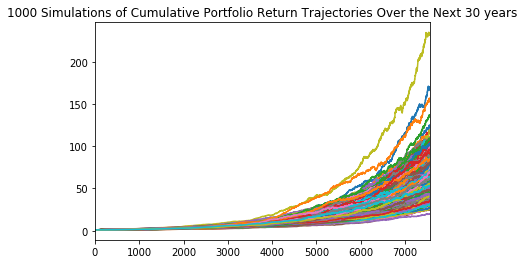

In [47]:
# Check that the simulation ran successfully
# Use the `plot` function to plot `1000` simulations of the potential trajectories of the portfolio based on 252 trading days
plot_title = f"{n+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 30 years"
portfolio_cumulative_returns.plot(legend=None, title=plot_title)

In [34]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
ending_cumulative_returns = portfolio_cumulative_returns.iloc[-1,:]
ending_cumulative_returns.head()

0    59.171007
1    53.378151
2    57.295425
3    49.200255
4    56.382877
Name: 7560, dtype: float64

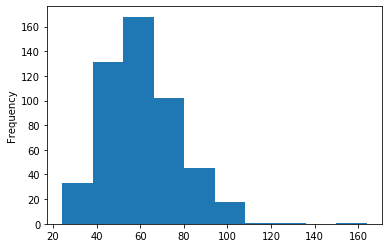

In [35]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
ending_cumulative_returns.plot(kind='hist', bins=10)

In [36]:
# Display the 90% confidence interval for the ending returns
ending_cumulative_returns.value_counts(bins=10)/len(ending_cumulative_returns)
confidence_interval = ending_cumulative_returns.quantile(q=[0.05, 0.95])
confidence_interval

0.05    37.132139
0.95    90.969353
Name: 7560, dtype: float64

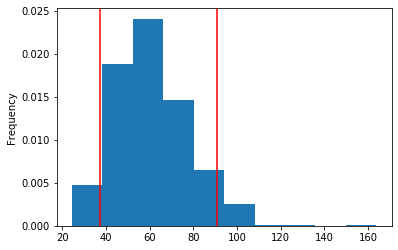

In [37]:
# Visualize the distribution of the ending returns
plt.figure();
ending_cumulative_returns.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

---

## Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at `30` years for the `10th`, `50th`, and `90th` percentiles?

2. Given an initial investment of `$20,000`, what is the expected return in dollars at the `10th`, `50th`, and `90th` percentiles?

3. Given the current projected annual income from the Plaid analysis, will a `4%` withdrawal rate meet or exceed that value at the `10th` percentile? Note: This is basically determining if retirement income is equivalent to current income.

4. How would a `50%` increase in the initial investment amount affect the `4%` retirement withdrawal? In other words, what happens if the initial investment had been bigger?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [38]:
# Compute cumulative returns
confidence_interval = ending_cumulative_returns.quantile(q=[.1, .5, .9])
confidence_interval

0.1    40.192937
0.5    58.909702
0.9    82.989617
Name: 7560, dtype: float64

### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [39]:
# Set initial investment
initial_investment = 20000
# Compute expected portfolio return
investment_pnl_10th_percentile = initial_investment * confidence_interval.iloc[0]
investment_pnl_50th_percentile = initial_investment * confidence_interval.iloc[1]
investment_pnl_90th_percentile = initial_investment * confidence_interval.iloc[2]

print(f"10th percentile expected return = ${investment_pnl_10th_percentile}")
print(f"50th percentile expected return = ${investment_pnl_50th_percentile}")
print(f"90th percentile expected return = ${investment_pnl_90th_percentile}")

10th percentile expected return = $803858.7381695696
50th percentile expected return = $1178194.0366051558
90th percentile expected return = $1659792.339722268


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [43]:
# Set Plaid's projected income
plaid_projected_annual_income = 7389

# Calculate the 4% withdrawal for the ending return as retirement income
retirement_income = .04 * (initial_investment * portfolio_cumulative_returns.quantile(.1)).iloc[0]
# Determine if the retirement income meets or exceeds the current projected income
if retirement_income >= plaid_projected_annual_income:
    print(f"You will have ${retirement_income:.2f} in retirement income which is sufficient")
else:
    print(f"You will have ${retirement_income:.2f} in retirement income which is not sufficient")

You will have $1404.61 in retirement income which is not sufficient


### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [45]:
# Re-calculate the retirement income with a 50% increase in the initial investment amount
new_initial_investment = 1.5 * initial_investment
# Calculate the 4% withdrawal for the ending return as retirement income
retirement_income = .04 * (new_initial_investment * portfolio_cumulative_returns.quantile(.1)).iloc[0]
# Determine if the retirement income meets or exceeds the current projected income
if retirement_income >= plaid_projected_annual_income:
    print(f"You will have ${retirement_income:.2f} in retirement income which is sufficient")
else:
    print(f"You will have ${retirement_income:.2f} in retirement income which is not sufficient")

You will have $2106.91 in retirement income which is not sufficient


### Optional Challenge

Use the Monte Carlo data and calculate the cumulative returns at the `5%`, `50%`, and `95%` quartiles and plot this data as a line chart to see how the cumulative returns change over the life of the investment.

In this section, you need to calculate and plot the cumulative returns for the median and `90%` confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [ ]:
# Compute projected returns

# Display sample data


In [ ]:
# Plot the cumulative returns over time


In [ ]:
# Compute portfolio performance over time

# Plot projected performance over time
